Analyzing IMDB dataset moview reviews. Using Keras to determine is moview review was Positive(1) or Negative(0)

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb

Loading training data and test data

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

**train_data** 
Represents an array of numbers which essentially indexes of words.

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
word_indexes = imdb.get_word_index()

In [6]:
word_indexes

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

This dictionary is not very helpful for us to decode review. Thus it will be nice to reverse it.

In [7]:
reversed_word_indexes = dict([(val, key) for (key, val) in word_indexes.items()])

Quick and easy function to decode review. Note we need to have offset of 3, (1. Padding, 2. Start of sequence, 3. Unknown) otherwise review will not make any sense.

In [8]:
def decode_review(sequence, reversed_word_indexes):
    review = ' '.join([reversed_word_indexes.get(i - 3, '?') for i in sequence])
    return review

In [9]:
review = decode_review(train_data[0], reversed_word_indexes)

In [10]:
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

This is an Example of decoded review. 

#### Preparing data

Now that we know what those numbers represent, we can prepare our data to be passed to keras. We need to convers single dimension array into numpy matrix. Which is called One hot encoding

In [11]:
import numpy as np

def vectorize_data(sequences, dimensions=10000):
    matrix = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
            matrix[i, sequence] = 1
    return matrix
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

In [12]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

For labels we can just convert it into numpy array of float32 numbers

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [14]:
y_test = np.asarray(test_labels).astype('float32')
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

#### Creating our model

Now that we have our data prepared, we can start working on our Keras model. 
We will have 2 Dense layers of 16 NN nodes with activation function 'relu' and last Dense layer will be our output layer of dense 1 with activation function 'sigmoid' 

In [15]:
from keras import layers, models

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


Next we need to compile our model and for that we need to provide 3 parameters:
 1. optimizer function
 2. loss function
 3. metrics 
In our case optimizer 'rmsprop'
loss_function will be 'binary_crossentropy' because we are dealing with binary classification where output can only be 0 or 1
metrics will be 'accuracy'

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Next step is to validate our approach and see if our model works. For that we will run validation process deviving train data into sets of 10000 items

In [18]:
x_val = x_train[:10000]
x_partial_train = x_train[10000:]

y_val = y_train[:10000]
y_partial_train = y_train[10000:]

In [19]:
print(len(x_val), len(x_partial_train))

10000 15000


In [20]:
history = model.fit(x_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 257us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 1s 74us/step - loss: 

Training is done, let's now see if our model overfits and see how we can takle model to improve its result

In [21]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
accuracy = history_dict['acc']
validation_accuracy = history_dict['val_acc']

loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

As you can see above our training accuracy keeps growing with every epoch, up to 99% however validation accuracy peaks on 4th epoch and then starts to overfit.

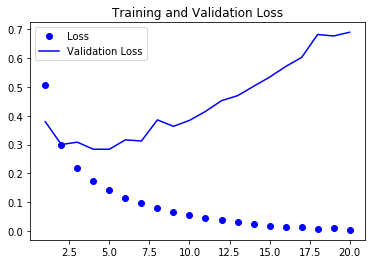

In [23]:
plt.clf()

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Same applies to loss metrics. Loss going down to 0 with each epoch, however validation loss overfits after 4th epoch.

#### Finally
Let's train our model with final train and testing data for 4 epochs and see our final results

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 1s 45us/step


In [25]:
result

[0.3231448763561249, 0.87348]

This was a fairly naive approach, but even with this approach I managed to get 88% accuracy.

In [26]:
model.predict(x_test)

array([[0.1402615 ],
       [0.9997028 ],
       [0.29552507],
       ...,
       [0.07234982],
       [0.04342842],
       [0.48153386]], dtype=float32)

Trying to change number of hidden units in input layers and Number of Layers to see what effect it has on model accuracy.

In [27]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 54us/step - loss: 0.4418 - acc: 0.8109
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2470 - acc: 0.9110
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.1903 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 1s 39us/step


In [28]:
result

[0.31386076488494874, 0.87996]

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.4393 - acc: 0.8281
Epoch 2/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.2686 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.2131 - acc: 0.9262
Epoch 4/4
25000/25000 [==============================] - 1s 39us/step


In [30]:
result

[0.2848530286693573, 0.88668]

In [31]:
model.predict(x_test)

array([[0.22009897],
       [0.99956304],
       [0.81506205],
       ...,
       [0.13442779],
       [0.06842265],
       [0.45911592]], dtype=float32)

## Overfitting and Underfiting

**Increasing, Decrising number of units**

In [34]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['acc'])


In [35]:
small_model = models.Sequential()
small_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
small_model.add(layers.Dense(4, activation='relu'))
small_model.add(layers.Dense(1, activation='sigmoid'))

small_model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['acc'])

In [38]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.4933 - acc: 0.8151 - val_loss: 0.3659 - val_acc: 0.8773
Epoch 2/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.2813 - acc: 0.9044 - val_loss: 0.2963 - val_acc: 0.8846
Epoch 3/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.2099 - acc: 0.9247 - val_loss: 0.2959 - val_acc: 0.8796
Epoch 4/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1749 - acc: 0.9373 - val_loss: 0.2866 - val_acc: 0.8868
Epoch 5/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1499 - acc: 0.9465 - val_loss: 0.3053 - val_acc: 0.8825
Epoch 6/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1310 - acc: 0.9548 - val_loss: 0.3462 - val_acc: 0.8742
Epoch 7/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1152 - acc: 0.9613 - val_loss: 0.3537 - val_ac

In [39]:
small_hist = small_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.5641 - acc: 0.7770 - val_loss: 0.4800 - val_acc: 0.8634
Epoch 2/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.3970 - acc: 0.8885 - val_loss: 0.3747 - val_acc: 0.8785
Epoch 3/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.3035 - acc: 0.9076 - val_loss: 0.3270 - val_acc: 0.8790
Epoch 4/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.2492 - acc: 0.9204 - val_loss: 0.2939 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.2143 - acc: 0.9289 - val_loss: 0.2828 - val_acc: 0.8896
Epoch 6/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.1898 - acc: 0.9370 - val_loss: 0.2817 - val_acc: 0.8885
Epoch 7/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1709 - acc: 0.9430 - val_loss: 0.2817 - val_ac

In [40]:
original_val_loss = original_hist.history['val_loss']
small_val_loss = small_hist.history['val_loss']


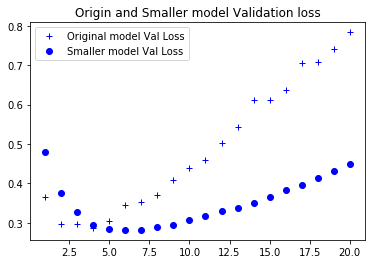

In [42]:
epochs = range(1, 21)

plt.plot(epochs, original_val_loss, 'b+', label='Original model Val Loss')
plt.plot(epochs, small_val_loss, 'bo', label='Smaller model Val Loss')
plt.title("Origin and Smaller model Validation loss")
plt.legend()
plt.show()

As you can see, smaller model starts overfitting later epochs 6th, in comparison with original model that starts to overfit after 4th epoch

Now we will try increase number of hidden units

In [48]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['acc'])

In [49]:
bigger_model_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.4529 - acc: 0.7975 - val_loss: 0.2806 - val_acc: 0.8888
Epoch 2/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.2217 - acc: 0.9115 - val_loss: 0.3052 - val_acc: 0.8678
Epoch 3/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.1231 - acc: 0.9525 - val_loss: 0.3279 - val_acc: 0.8776
Epoch 4/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.0733 - acc: 0.9763 - val_loss: 0.4814 - val_acc: 0.8262
Epoch 5/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.0616 - acc: 0.9884 - val_loss: 0.4107 - val_acc: 0.8797
Epoch 6/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.0037 - acc: 0.9996 - val_loss: 0.5978 - val_acc: 0.8748
Epoch 7/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.0952 - acc: 0.9888 - val_loss: 0.6274 - 

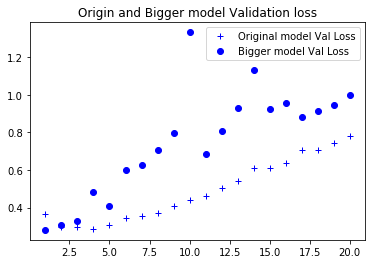

In [50]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']
epochs = range(1, 21)

plt.clf()
plt.plot(epochs, original_val_loss, 'b+', label='Original model Val Loss')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model Val Loss')
plt.title("Origin and Bigger model Validation loss")
plt.legend()
plt.show()

Bigger model start to overfit almost immideately.

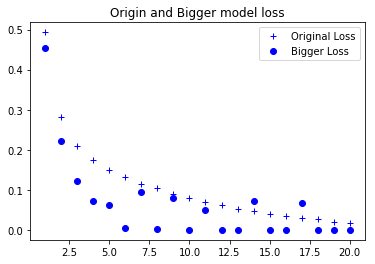

In [52]:
bigger_model_loss = bigger_model_hist.history['loss']
original_model_loss = original_hist.history['loss'] 
epochs = range(1, 21)

plt.clf()
plt.plot(epochs, original_model_loss, 'b+', label='Original Loss')
plt.plot(epochs, bigger_model_loss, 'bo', label='Bigger Loss')
plt.title("Origin and Bigger model loss")
plt.legend()
plt.show()

Bigger model are much faster to get close to 0 in training loss, however they are easy to overfit due to bigger capacity

## Adding weight regularization

Now we will try to add weight regularization to its layers and see how model performs

In [55]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.001), 
                          input_shape=(10000,)))
l2_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [56]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 104us/step - loss: 0.5135 - acc: 0.8144 - val_loss: 0.3840 - val_acc: 0.8799
Epoch 2/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.3185 - acc: 0.9036 - val_loss: 0.3335 - val_acc: 0.8889
Epoch 3/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.2691 - acc: 0.9200 - val_loss: 0.3373 - val_acc: 0.8834
Epoch 4/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.2487 - acc: 0.9283 - val_loss: 0.3468 - val_acc: 0.8795
Epoch 5/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2359 - acc: 0.9336 - val_loss: 0.3467 - val_acc: 0.8821
Epoch 6/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2314 - acc: 0.9346 - val_loss: 0.3562 - val_acc: 0.8799
Epoch 7/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2210 - acc: 0.9410 - val_loss: 0.3560 - val_ac

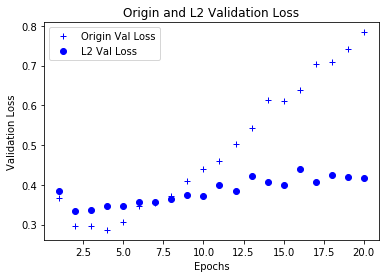

In [58]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label="Origin Val Loss")
plt.plot(epochs, l2_model_val_loss, 'bo', label="L2 Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Origin and L2 Validation Loss")
plt.legend()
plt.show()

In [59]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, activation='relu', 
                          kernel_regularizer=regularizers.l1(0.001), 
                          input_shape=(10000,)))
l1_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [60]:
l1_model_hist = l1_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.8848 - acc: 0.7798 - val_loss: 0.6139 - val_acc: 0.8463
Epoch 2/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.5881 - acc: 0.8509 - val_loss: 0.5687 - val_acc: 0.8529
Epoch 3/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.5509 - acc: 0.8596 - val_loss: 0.5766 - val_acc: 0.8410
Epoch 4/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.5348 - acc: 0.8621 - val_loss: 0.5326 - val_acc: 0.8647
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.5289 - acc: 0.8628 - val_loss: 0.5171 - val_acc: 0.8684
Epoch 6/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.5145 - acc: 0.8682 - val_loss: 0.5126 - val_acc: 0.8702
Epoch 7/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.5173 - acc: 0.8666 - val_loss: 0.5089 - val_ac

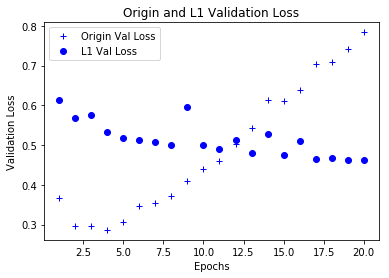

In [61]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label="Origin Val Loss")
plt.plot(epochs, l1_model_val_loss, 'bo', label="L1 Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Origin and L1 Validation Loss")
plt.legend()
plt.show()

In [62]:
l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(16, activation='relu', 
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                          input_shape=(10000,)))
l1_l2_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [63]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.9113 - acc: 0.7450 - val_loss: 0.6471 - val_acc: 0.8454
Epoch 2/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.6144 - acc: 0.8376 - val_loss: 0.6053 - val_acc: 0.8296
Epoch 3/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.5687 - acc: 0.8520 - val_loss: 0.5619 - val_acc: 0.8579
Epoch 4/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.5482 - acc: 0.8580 - val_loss: 0.5343 - val_acc: 0.8626
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.5373 - acc: 0.8609 - val_loss: 0.5300 - val_acc: 0.8643
Epoch 6/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.5187 - acc: 0.8674 - val_loss: 0.5652 - val_acc: 0.8380
Epoch 7/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.5196 - acc: 0.8663 - val_loss: 0.5098 - val_ac

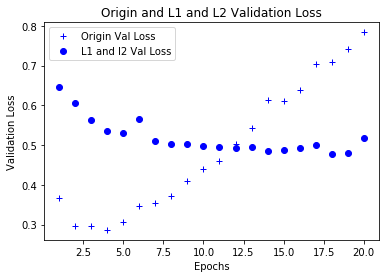

In [64]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label="Origin Val Loss")
plt.plot(epochs, l1_l2_model_val_loss, 'bo', label="L1 and l2 Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Origin and L1 and L2 Validation Loss")
plt.legend()
plt.show()

## Adding dropout

In [69]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [70]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.5947 - acc: 0.6761 - val_loss: 0.4435 - val_acc: 0.8645
Epoch 2/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.4414 - acc: 0.8112 - val_loss: 0.3287 - val_acc: 0.8817
Epoch 3/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.3539 - acc: 0.8640 - val_loss: 0.2877 - val_acc: 0.8902
Epoch 4/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2994 - acc: 0.8932 - val_loss: 0.2844 - val_acc: 0.8878
Epoch 5/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.2602 - acc: 0.9085 - val_loss: 0.2765 - val_acc: 0.8906
Epoch 6/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2268 - acc: 0.9212 - val_loss: 0.2873 - val_acc: 0.8900
Epoch 7/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.2013 - acc: 0.9327 - val_loss: 0.3100 - val_ac

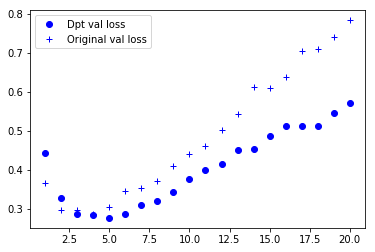

In [71]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']
plt.plot(epochs, dpt_model_val_loss, 'bo', label="Dpt val loss")
plt.plot(epochs, original_val_loss, 'b+', label="Original val loss")
plt.legend()
plt.show()

In [92]:
final_model = models.Sequential()
final_model.add(layers.Dense(8, 
                             activation='relu', 
                             kernel_regularizer=regularizers.l2(0.001), 
                             input_shape=(10000,)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(1, activation='sigmoid'))
final_model.compile(optimizer="rmsprop", loss="mse", metrics=['acc'])

In [93]:
final_hist = final_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2347 - acc: 0.6893 - val_loss: 0.1983 - val_acc: 0.8004
Epoch 2/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1950 - acc: 0.7881 - val_loss: 0.1661 - val_acc: 0.8664
Epoch 3/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1722 - acc: 0.8316 - val_loss: 0.1467 - val_acc: 0.8780
Epoch 4/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.1586 - acc: 0.8510 - val_loss: 0.1320 - val_acc: 0.8831
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1471 - acc: 0.8663 - val_loss: 0.1251 - val_acc: 0.8791
Epoch 6/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1396 - acc: 0.8738 - val_loss: 0.1248 - val_acc: 0.8786
Epoch 7/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.1334 - acc: 0.8786 - val_loss: 0.1158 - val_ac

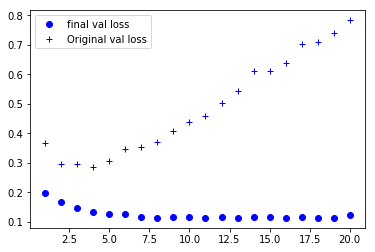

In [94]:
final_hist_val_loss = final_hist.history['val_loss']
plt.plot(epochs, final_hist_val_loss, 'bo', label="final val loss")
plt.plot(epochs, original_val_loss, 'b+', label="Original val loss")
plt.legend()
plt.show()

In [95]:
final_model = models.Sequential()
final_model.add(layers.Dense(16, 
                             activation='relu', 
                             kernel_regularizer=regularizers.l2(0.001), 
                             input_shape=(10000,)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(1, activation='sigmoid'))
final_model.compile(optimizer="rmsprop", loss="mse", metrics=['acc'])

final_hist = final_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.2347 - acc: 0.6916 - val_loss: 0.1706 - val_acc: 0.8673
Epoch 2/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1732 - acc: 0.8174 - val_loss: 0.1286 - val_acc: 0.8807
Epoch 3/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1462 - acc: 0.8582 - val_loss: 0.1177 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1310 - acc: 0.8782 - val_loss: 0.1122 - val_acc: 0.8865
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1193 - acc: 0.8894 - val_loss: 0.1134 - val_acc: 0.8840
Epoch 6/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1133 - acc: 0.8967 - val_loss: 0.1119 - val_acc: 0.8855
Epoch 7/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1076 - acc: 0.9019 - val_loss: 0.1125 - val_ac

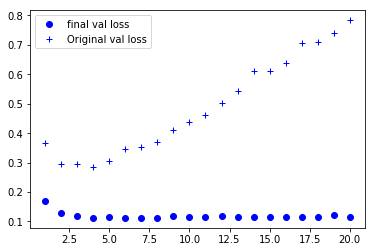

In [96]:
final_hist_val_loss = final_hist.history['val_loss']
plt.plot(epochs, final_hist_val_loss, 'bo', label="final val loss")
plt.plot(epochs, original_val_loss, 'b+', label="Original val loss")
plt.legend()
plt.show()

In [97]:
t_model = models.Sequential()
t_model.add(layers.Dense(16, 
                             activation='relu', 
                             kernel_regularizer=regularizers.l2(0.001), 
                             input_shape=(10000,)))
t_model.add(layers.Dropout(0.5))
t_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
t_model.add(layers.Dropout(0.5))
t_model.add(layers.Dense(1, activation='sigmoid'))
t_model.compile(optimizer="rmsprop", loss="mse", metrics=['acc'])

t_model.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
25000/25000 [==============================] - 2s 74us/step - loss: 0.2247 - acc: 0.7087
Epoch 2/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.1615 - acc: 0.8351
Epoch 3/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.1363 - acc: 0.8696
Epoch 4/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.1228 - acc: 0.8886
Epoch 5/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.1155 - acc: 0.8955
Epoch 6/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.1101 - acc: 0.9008
Epoch 7/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.1040 - acc: 0.9085
Epoch 8/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.1001 - acc: 0.9117
Epoch 9/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.1004 - acc: 0.9098
Epoch 10/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.0973 - acc: 0.9133

In [98]:
result = t_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 53us/step


In [99]:
result

[0.11460810596942901, 0.87928]

In [100]:
t_model.predict(x_test)

array([[0.06430233],
       [0.99945295],
       [0.9253927 ],
       ...,
       [0.07677269],
       [0.03488806],
       [0.71662575]], dtype=float32)